<a href="https://colab.research.google.com/github/reiemrednaxela/notebooks/blob/main/HandsOnML_Workshop_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Was ist Machine Learning? 🧠

---



**Machine Learning**

Ein künstliches System lernt **einer Aufgabe** aus Beispielen und kann diese nach Beendigung der Lernphase **verallgemeinern**.

*   keine explizite Programmierung (Lernprozess)
*   Lernen 💡: Erkennen von Mustern und Gesetzmäßigkeiten
*   Aufgabenspezifisches Qualitätsmaß 📈


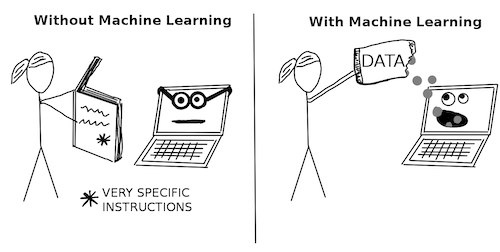

**Classification**

Einteilung (Klassifizierung) von Objekten oder Situationen in Klassen.
Zum Beispiel Bilderkennung 🖼:

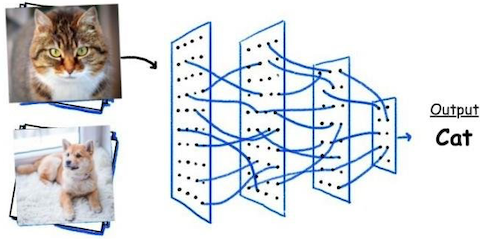

([Bildquelle](https://www.researchgate.net/figure/Classification-of-two-classes-dog-and-cat-using-CNN_fig2_353247632))

**Modelle**

Grundlage der meisten Machine Learning Ansätze ist ein **Modell**.
Diese sind aufgabenspezifisch: z.B. ein Modell für Bilderkennung 🖼, ein Modell für Textanalyse 🔤, ein Modell für Prognose 📉, ..

1.   Modelle sind eine Näherung an die Realität: 

> "*All models are wrong, some models are useful*". ([Zitat](https://en.wikipedia.org/wiki/All_models_are_wrong))

2.   Ein Modell lernt im *Training* 🏋 anhand von *Trainingsdaten*. 

> Danach erfolgt eine Anwendung auf *ungesehene* Daten --> Generalisierung

3.   Man unterscheidet zwischen *supervised* und *unsupervised* Learning.

([Bildquelle](https://christophm.github.io/interpretable-ml-book/))

# Kurzeinführung in python 🐍


---



Python ist eine universelle, üblicherweise interpretierte, höhere Programmiersprache. 
Sie hat den Anspruch, einen gut lesbaren, knappen Programmierstil zu fördern.
In der Data Science und Machine Learning Community ist python sehr verbreitet.
Dieses Colab Notebook ist an eine python Umgebung angebunden, wir können also direkt loslegen.

Starten wir mit einem kleinen Beispiel.
Um es auszuführen, einfach mit der Maus über die Box fahren und den Play Button ▶ links neben dem Code tippen.
Das Ergebnis wird darunter ausgegeben.
Ein grüner Haken links neben dem Code zeigt eine erfolgreiche Ausführung an.

In [1]:
print("Hallo Welt!")

Hallo Welt!


In python lassen sich Variablen einfach per Zuweisung definieren.
(Der jeweilige Datentyp muss nicht im Voraus deklariert werden)

In [2]:
x = "Moin!"
y = 1 + 2 * 10
# Kommentarzeilen wie diese beginnen mit der Raute (#) und werden bei der Ausführung ignoriert
# print(x)
print(y * 2)

42


Auch Listen lassen sich sehr einfach in python definieren:

In [3]:
my_list = ['Fischers', 'Fritz', 'fischt', 'frische', 'Fische', '!']
print(my_list[1])

Fritz


Um python zu lernen gibt es zahlreiche hervorragende online Angebote, z.B. auf [Kaggle](https://www.kaggle.com/learn/python) oder [datacamp](https://www.datacamp.com/courses/intro-to-python-for-data-science). Ein [Cheat Sheet](https://www.pythoncheatsheet.org/) kann beim Lernen sehr nützlich sein.

# Image Classification 🖼 mit dem Vision Transformer 


---



In diesem Beispiel wollen wir ein bereits trainiertes Deep Learning Modell für Image Classification herunterladen und dieses ausprobieren.
Bei dem Modell handelt es sich um einen sogenannten Transformer.
Diese wurde 2017 vom [Google Brain Team](https://research.google/teams/brain/) entwickelt und erfreut sich seither aufgrund guter Performance und Effizienz hoher Beliebtheit bei verschiedensten Anwendungen.

Unser trainiertes Modell nennt sich *Vision Transformer* uns ist (neben zahlreichen anderen vortrainierten Modell) im *Hugging Face* 🤗 [Model Repository](https://huggingface.co/models) erhältlich.
Dort findet sich auch ein detaillierte [Beschreibung des Modells](https://huggingface.co/google/vit-base-patch16-224) (mit welchen Daten trainiert wurde, welche Parameter gesetzt wurden, etc.).
Es gibt hierfür inzwischen sogar ein dediziertes [python Paket](https://pypi.org/project/transformers/), in dem die Transformer Modelle des besagten Repositories enthalten sind.

Los geht's!

Zunächst laden wir das transformers python Paket 📦 herunter und installieren es in unserer Colab Umgebung.
Dieser Schritt muss nur einmalig zu Beginn ausgeführt werden und kann (je nach Konnektivität) ein paar Minuten dauern.

In [ ]:
# download and install 'transformers' package
! pip install transformers

Jetzt binden wir die heruntergeladenen Pakete in unsere python Session ein und erstellen eine Instanz des Transformer Modells.
Hierbei wird im Hintergrund zunächst das vortrainierte Modell heruntergeladen, was (je nach Konnektivität) auch wieder kurz dauern kann.

In [ ]:
# download a pre-trained vision transformer (VIT) model and feature extractor
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

model_name = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

Das Modell ist jetzt heruntergeladen und unter der Variable *model* in unserer python Session verfügbar.
Lasst es uns also direkt ausprobieren.
Was würde sich besser dazu eignen, als ein Katzenphoto?
Also besorgen wir uns zunächst eines.

In [ ]:
# download and show a cat photo
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
display(image)

Sehr schön 🐈. 

... Und was sagt unser Modell dazu?
Fragen wir es!

In [ ]:
# get the model's classification for the downloaded image
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item() # one of the 1000 ImageNet classes
print("Predicted class:", model.config.id2label[predicted_class_idx])

Unser Modell hat also erkannt, dass es sich um ein Foto einer Katze handelt.
Es gibt uns sogar eine Einschätzung der Rasse, nämlich Egyptian cat (Ägyptische Mau), zurück.
Sehr beeindruckend! 👏

Lasst uns einmal Schritt für Schritt verstehen, was hier passiert.
Der erste Schritt ist die **Feature Extraction**.
Die für das Modell relevanten *Features* werden aus dem Foto extrahiert.
Das Ergebnis ist eine Menge von numerischen Werten (ein Tensor 🔢), mit denen das Modell (buchstäblich) **rechnen** kann.

In [ ]:
inputs = feature_extractor(images=image, return_tensors="pt")
print(inputs)
print(inputs['pixel_values'].shape)

Die zuvor extrahierten Features werden jetzt als Input an das Modell gegeben.
Das Modell gibt uns seine *outputs* zurück.
Diese sind (wie die *inputs*) wieder ein Tensor 🔢:

In [ ]:
outputs = model(**inputs)
logits = outputs.logits
print(logits)

❓❓ Was bedeuten diese Werte? Und wie schließt man daraus auf die *Egyptian cat*?

Hierzu muss man verstehen, dass das Modell trainiert wurde, um eine (zuvor definierte) [Menge von 1.000 Klassen](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) zu klassifizieren.
Die *Egyptian cat* ist eine dieser Klassen, neben noch 999 weiteren.
Die Model outputs beinhalten einen numerischen Wert für jede Klasse.
Tatsächlich handelt es sich also um 1.000 Werte:

In [ ]:
print(len(logits[0]))

Jeder der 1.000 Werte spiegelt also eine Klasse wieder.
Jeder Wert ist eine Schätung des Modells, wie gut die Klasse zu den Daten passt.
Je höher der Wert, desto besser passt die Klasse zum Foto (laut Modellschätzung).
Je niedriger der Wert, desto schlechter passt die Klasse zum Foto (laut Modellschätzung).
Am Ende entscheiden wir uns für die Klasse mit dem höchsten Wert.
Sprich: Die Klasse, die das Modell als am wahrscheinlichsten erachtet.

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

# Übung 1 💻


---



**Aufgabe**.
Sucht Euch den Link zu einem online verfügbaren Bild und probiert, darauf das Vision Transformer Model anzuwenden!
Ein paar Inspirationsquellen findet Ihr in den Kommentarzeilen der folgenden Code Box.

Im Anschluss werden wir gemeinsam die Ergebnisse diskutieren. Macht Euch daher beim Betrachten der Ergebnisse schon einmal Gedanken über die folgenden Fragen:

*   Bei welchen Beispielen hat die Klassifizierung gut ✅ funktioniert? 
*   Bei welchen Beispielen hat sie noch nicht so gut ❌ funktioniert?
*   Woran könnte das liegen?
*   Wie könnte man die Ergebnisse verbessern?

**Bonusaufgabe** (optional & für python Fortgeschrittene). Lasst Euch für jedes Foto nicht nur die *beste* Klasse ausgeben, sondern die Top 3. Passt hierfür die Verarbeitung der *logits* in Eurem Code an.

In [ ]:
## >> This code block must be executed only once at the beginning!
## >> The actual exercise starts in the next block below.

# download and install 'transformers' package
! pip install transformers
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
model_name = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

In [ ]:
## Here is an example list of image URLs that you may use:
##
## https://upload.wikimedia.org/wikipedia/commons/3/39/Domestic_Goose.jpg
## https://www.tchibo.de/newmedia/page/img/a869b78bac2d53db/image_classic_jpg.jpg
## https://www.tchibo.de/newmedia/art_img/MAIN-CENSHARE/e2202788c83574ac/.jpg
## https://www.tchibo.de/newmedia/art_img/MAIN-CENSHARE/e96ad633876d5d3c/anrichte-mit-schiebetueren-schwarz.jpg
##

# download and show a photo
url = 'https://www.sueddeutsche.de/image/sz.1.2451926/1408x792?v=1520214154&format=webp'
image = Image.open(requests.get(url, stream=True).raw)
display(image)

# get the model's classification for the downloaded image
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item() # one of the 1000 ImageNet classes
print("Predicted class:", model.config.id2label[predicted_class_idx])

# Sentiment Analyse 😀😢 mit BERT 


---



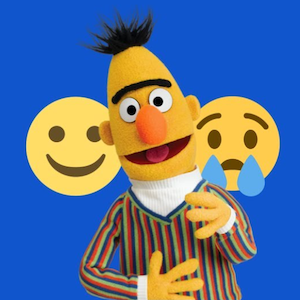

Bei [BERT](https://en.wikipedia.org/wiki/BERT_(language_model)) (Bidirectional Encoder Representations from Transformers) handelt es sich um eine Deep Learning Technik für Natural Language Processing (NLP), also das Verarbeiten von Textdaten.
Die Methode wurde 2018 von Google veröffentlicht basiert auf einem *Pre-Training* auf einem riesigen Datensatz: In der ursprünglichen Variante wurden die Datensätze BooksCorpus (800 Mio Wörter) und das gesamte englischsprachige Wikipedia (2,500 Mio Wörter) verwendet.
BERT eignet sich hervorragend als Baseline-Modell, welches durch spezifisches *Fine-Tuning* auf eine bestimmte Aufgabe optimiert werden kann.
Ein klassisches Beispiel für einen solchen *Downstream Task* ist die Sentiment Analyse.

Bei der [Sentiment Analyse](https://de.wikipedia.org/wiki/Sentiment_Detection) ist das Ziel, ein *Sentiment* (positiv 😀, negativ 😢 oder neutral 😐), sprich die Empfindung/Stimmung, aus einem Text abzuleiten.
Um ein paar einfache Beispiele zu nennen:

*   "*Das Essen schmeckt hervorragend*" --> 😀
*   "*Das Wetter war furchtbar*" --> 😢
*   "*Das Fahrrad ist rot*" --> 😐

Natürlich ist ein Sentiment nicht in allen Fällen so offensichtlich herauszulesen, weshalb regelbasierte Ansätze bei diesem Problem schnell an ihre Grenzen stoßen.
Ein klarer Fall für Deep Learning!?

Im Folgenden wollen wir das bereits trainierte Modell [german-sentiment-bert](https://huggingface.co/oliverguhr/german-sentiment-bert) aus dem Hugging Face 🤗 Model Hub verwenden.
Es basiert auf dem BERT Architektur und wurde auf deutschsprachigen 🇩 Texten trainiert.
Hierzu laden wir uns zunächst das zugehörige python Paket 📦 [germansentiment](https://pypi.org/project/germansentiment/) herunter und installieren es:

In [ ]:
!pip install germansentiment transformers

Der folgende Abschnitt ist eigenes Coding.
Es beinhaltet die Implementierung einer eigenen Klasse *CustomSentimentModel*.
Diese wird uns später helfen, um die Ausgaben des Modells auszuwerten.
Einfach die Code Box ausführen.
Dadurch wird die Klasse in die python Sitzung geladen und kann später verwendet werden.

In [ ]:
# Custom code for a Sentimemt Model.
# Downloads a pre-trained model and yields predictions for list of input sentences.
!pip install germansentiment transformers

from transformers import AutoModelForSequenceClassification, AutoTokenizer
from typing import List
import torch
import re

from scipy.special import expit
import numpy as np
import pandas as pd

# slightly adjusted class with the original taken from https://github.com/oliverguhr/german-sentiment
class CustomSentimentModel():
    def __init__(self, model_name: str = "oliverguhr/german-sentiment-bert"):
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        self.clean_chars = re.compile(r'[^A-Za-züöäÖÜÄß ]', re.MULTILINE)
        self.clean_http_urls = re.compile(r'https*\\S+', re.MULTILINE)
        self.clean_at_mentions = re.compile(r'@\\S+', re.MULTILINE)

    def predict_sentiment(self, texts: List[str]) -> pd.DataFrame:
        texts = [self.clean_text(text) for text in texts]
        # Add special tokens takes care of adding [CLS], [SEP], <s>... tokens in the right way for each model.
        input_ids = self.tokenizer(texts, padding=True, truncation=True, add_special_tokens=True)
        input_ids = torch.tensor(input_ids["input_ids"])

        with torch.no_grad():
            logits = self.model(input_ids)    

        logits = logits[0].numpy()
        res = pd.DataFrame(np.round(expit(logits)*100.0,2))
        colnames = [ model.model.config.id2label[i] for i in range(3) ]
        res.columns = colnames
        res['text'] = texts
        res = res[['text']+colnames]
        res.columns = ['text', '😀', '😢', '😐']
        return res

    def replace_numbers(self,text: str) -> str:
            return text.replace("0"," null").replace("1"," eins").replace("2"," zwei").replace("3"," drei").replace("4"," vier").replace("5"," fünf").replace("6"," sechs").replace("7"," sieben").replace("8"," acht").replace("9"," neun")         

    def clean_text(self,text: str)-> str:    
            text = text.replace("\n", " ")        
            text = self.clean_http_urls.sub('',text)
            text = self.clean_at_mentions.sub('',text)        
            text = self.replace_numbers(text)                
            text = self.clean_chars.sub('', text) # use only text chars                          
            text = ' '.join(text.split()) # substitute multiple whitespace with single whitespace   
            text = text.strip().lower()
            return text

Jetzt erstellen eine Instanz des Modells. Hierbei wird im Hintergrund zunächst das vortrainierte Modell heruntergeladen, was (je nach Konnektivität) auch wieder kurz dauern kann.

In [ ]:
model = CustomSentimentModel()

Perfekt! 👍

Jetzt können wir das Modell direkt ausprobieren.
Hierzu verwenden die Methode *predict_sentiment*.
Diese erwartet eine Liste *texts* von Texten als Eingabe und gibt uns eine Tabelle (*pandas DataFrame*) als Ausgabe zurück.

In [ ]:
texts = ["Mit keinem guten Ergebnis",
         "Das war unfair", 
         "Das ist gar nicht mal so gut",
         "Total awesome!",
         "Dort fährt ein blaues Fahrrad...",
         'deine nase ist wirklich riesig']
res = model.predict_sentiment(texts)
display(res)

Diskussion: Wie ist diese Ausgabe zu interpretieren?

# Übung 2 💻


---



**Aufgabe**. Überlegt Euch ein paar eigene Texte und wendet das Sentiment Analysis Modell darauf an. Beachtet dabei, dass die Eingabetexte zuvor in eine Liste gepackt werden müssen. Ein paar Inspirationsquellen findet Ihr in den Kommentarzeilen der folgenden Code Box.

Interpretiert das Ergebnis:

*   Entsprechen die Einschätzungen des Modells Euren Erwartungen? 🤔
*   Bei welchen Beispielen hat das Modell gut ✅, bei welchen noch nicht so gut ❌ funktioniert?

**Bonusaufgabe** (optional & für python Fortgeschrittene). Schaut Euch die obige Implementierung der Methode *predict_sentiment* an. Welche Vorverarbeitungsschritte werden auf den Eingabetexten noch durchgeführt? Versucht, alle Zwischenschritte nachzuvollziehen. 

In [ ]:
## Here are some texts that you may try:
##
## "nicht so schlecht wie erwartet", 
## "Das ist gar nicht mal so schlecht",
## "Der Corona Test war positiv.",
## "Der Fall wurde an die Polzei übergeben.",
## "Was für ein Saftladen!", 
## "Auch wenn der Kundenservice zu wünschen übrig lässt, gibt es dort leckere Pasta",
## "Tchibo verkauft übrigens auch kaffee", 
## "Das interessiert mich nicht"
##

model = CustomSentimentModel()
texts = ["deine nase ist wirklich riesig",
         "ein rotes Fahrrad",
         "ein blaues Fahrrad",
         "Berlin bei Nacht ist immer knorke",
         "Du riechst ja heute stark",
         "amazon ist nicht so gut wie tchibo",
         "tchibo ist besser als amazon",
         "gar nicht mal so schlecht",
         "rotes auto",
         "deine skills sind stark",
         "das ist nicht nicht schlecht",
         "Das Hotel ist gar nicht mal so schlecht."]
res = model.predict_sentiment(texts)
display(res)

# GPT-3

---


Ein größerer Meilenstein in der Entwicklung stellt das Modell GPT-3 dar.
Es handelt sich auch um ein Transformer-basiertes NLP Modell und wurde im Sommer 2020 von [OpenAI](https://openai.com/) vorgestellt.

Das besondere an GPT-3 ist die schiere Größe des Modells, mit 175 Milliarden Modellparametern 😱.
Der Trainingsdatensatz umfasst knapp 500 Milliarden Datenpunkte, die größtenteils durch automatisierten Abgrasen des Internets (Web Crawling) gewonnen wurden.
Das Modell eignet sich auch sehr gut, um neue Texte zu generieren.
Es ist allerdings nicht frei zum Download erhältlich, sondern der Zugang wird durch OpenAI mit einer eigenen API reguliert.

Zum interaktiven Experimentieren gibt es den [GPT-3 Playground](https://beta.openai.com/playground), eine von OpenAI bereitgestellte GUI. Um es nutzen zu können, bedarf es einer einmaligen Registrierung.
Für diese Session ist dies nicht notwendig, wir werden aber einen gemeinsamen Blick auf die Fähigkeiten des Modells werfen.

# Weitere Infos 💡

---



Literatur & Blogs 📚

*   [OpenAI Blog](https://openai.com/blog/), [DeepMind Blog](https://deepmind.com/blog), Towards Data Science @ [Medium](https://towardsdatascience.com/)
*   *Interpretable Machine Learning: A Guide for Making Black Box Models Explainable* [Buch](https://christophm.github.io/interpretable-ml-book/) von Christoph Molnar
*   python [Cheat Sheet](https://www.pythoncheatsheet.org/)

Videos & Channels ⏭
*   [2 Minute Papers](https://www.youtube.com/c/K%C3%A1rolyZsolnai)
*   Youtube Reihe [Deep Learning](https://www.youtube.com/watch?v=aircAruvnKk) von 3Blue1Brown
*   Youtube Reihe [Neural Networks](https://www.youtube.com/watch?v=CqOfi41LfDw&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1) von StatQuest
*   [Ted Talk](https://www.youtube.com/watch?v=J-FzHIQ7SOs) von Jeff Dean (Head of AI @ Google): *AI isn't as smart as you think -- but it could be*


Kurse 💻

*    python Kurse bei [Kaggle](https://www.kaggle.com/learn/python) 
*    Data Science python Kurse bei [datacamp](https://www.datacamp.com/courses/intro-to-python-for-data-science)
